## IMPORTING LIBRARYS

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.datasets import fetch_california_housing 
from mpl_toolkits.basemap import Basemap
import plotly.express as px

## GETTING DATA

In [2]:
pure_data= fetch_california_housing()  
df=pd.DataFrame(data=pure_data.data,columns=pure_data.feature_names) 
df['MedHouseVal']=pure_data.target 
df=df.sample(frac=1) 
df 
X=df.drop(columns=['MedHouseVal'],axis=1)
y=df['MedHouseVal'] 
df 

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
3790,0.8198,6.0,2.660436,1.090343,542.0,1.688474,34.17,-118.37,3.250
7436,3.3661,45.0,4.897906,0.971204,1315.0,3.442408,33.94,-118.19,1.608
11204,3.6607,47.0,4.623853,1.036697,375.0,3.440367,33.83,-117.91,1.606
15367,4.0357,12.0,6.233333,1.158824,2778.0,2.723529,33.29,-117.20,2.959
10720,8.1093,17.0,7.315359,0.996732,1798.0,2.937908,33.63,-117.81,4.104
...,...,...,...,...,...,...,...,...,...
7415,2.6538,42.0,3.619377,0.993080,1218.0,4.214533,33.94,-118.22,1.434
2833,1.3527,30.0,2.247525,0.742574,169.0,1.673267,35.39,-119.02,0.600
17756,4.3750,29.0,4.981289,0.939709,2000.0,4.158004,37.35,-121.81,1.855
14756,2.5625,23.0,4.589091,1.069091,5176.0,18.821818,32.56,-116.97,1.533


In [3]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
3790,0.8198,6.0,2.660436,1.090343,542.0,1.688474,34.17,-118.37
7436,3.3661,45.0,4.897906,0.971204,1315.0,3.442408,33.94,-118.19
11204,3.6607,47.0,4.623853,1.036697,375.0,3.440367,33.83,-117.91
15367,4.0357,12.0,6.233333,1.158824,2778.0,2.723529,33.29,-117.20
10720,8.1093,17.0,7.315359,0.996732,1798.0,2.937908,33.63,-117.81
...,...,...,...,...,...,...,...,...
7415,2.6538,42.0,3.619377,0.993080,1218.0,4.214533,33.94,-118.22
2833,1.3527,30.0,2.247525,0.742574,169.0,1.673267,35.39,-119.02
17756,4.3750,29.0,4.981289,0.939709,2000.0,4.158004,37.35,-121.81
14756,2.5625,23.0,4.589091,1.069091,5176.0,18.821818,32.56,-116.97


In [4]:
y

3790     3.250
7436     1.608
11204    1.606
15367    2.959
10720    4.104
         ...  
7415     1.434
2833     0.600
17756    1.855
14756    1.533
15851    3.310
Name: MedHouseVal, Length: 20640, dtype: float64

In [5]:
df = pd.concat([X,y],axis=1)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
3790,0.8198,6.0,2.660436,1.090343,542.0,1.688474,34.17,-118.37,3.250
7436,3.3661,45.0,4.897906,0.971204,1315.0,3.442408,33.94,-118.19,1.608
11204,3.6607,47.0,4.623853,1.036697,375.0,3.440367,33.83,-117.91,1.606
15367,4.0357,12.0,6.233333,1.158824,2778.0,2.723529,33.29,-117.20,2.959
10720,8.1093,17.0,7.315359,0.996732,1798.0,2.937908,33.63,-117.81,4.104
...,...,...,...,...,...,...,...,...,...
7415,2.6538,42.0,3.619377,0.993080,1218.0,4.214533,33.94,-118.22,1.434
2833,1.3527,30.0,2.247525,0.742574,169.0,1.673267,35.39,-119.02,0.600
17756,4.3750,29.0,4.981289,0.939709,2000.0,4.158004,37.35,-121.81,1.855
14756,2.5625,23.0,4.589091,1.069091,5176.0,18.821818,32.56,-116.97,1.533


## VISUALIZING DATA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20640 entries, 3790 to 15851
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.6 MB


In [7]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
3790,0.8198,6.0,2.660436,1.090343,542.0,1.688474,34.17,-118.37,3.250
7436,3.3661,45.0,4.897906,0.971204,1315.0,3.442408,33.94,-118.19,1.608
11204,3.6607,47.0,4.623853,1.036697,375.0,3.440367,33.83,-117.91,1.606
15367,4.0357,12.0,6.233333,1.158824,2778.0,2.723529,33.29,-117.20,2.959
10720,8.1093,17.0,7.315359,0.996732,1798.0,2.937908,33.63,-117.81,4.104


In [8]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [9]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


### distribution of target values

/tmp/ipykernel_52669/3098026193.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  fig=sns.displot(y,palette='pastel')


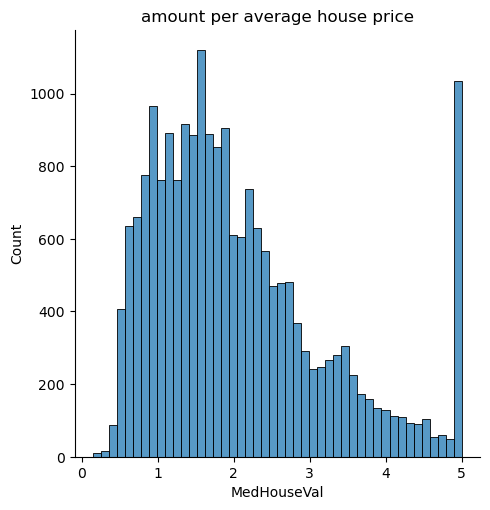

In [10]:
fig=sns.displot(y,palette='pastel') 
plt.title('amount per average house price')  
plt.savefig('./images/distribution-calhousing.png')
plt.show() 

### showing heat map of correlation matrix 

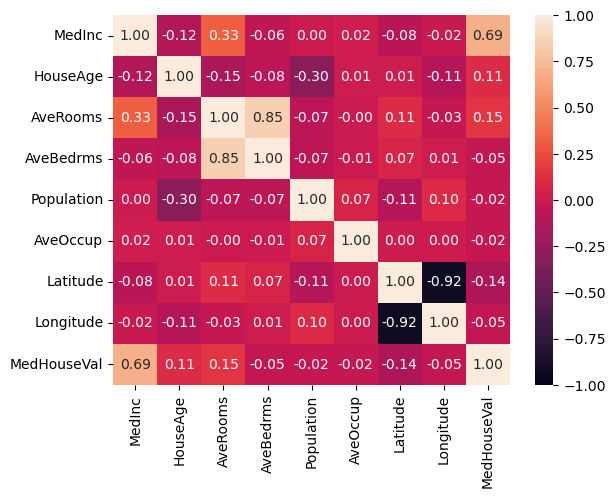

In [11]:
sns.heatmap(data=df.corr(),annot=True, fmt=".2f",mask=None,vmin=-1.0, vmax=1.0)  
plt.savefig('./images/correlation-heat-map.png')
plt.show()

### showing average house price per region

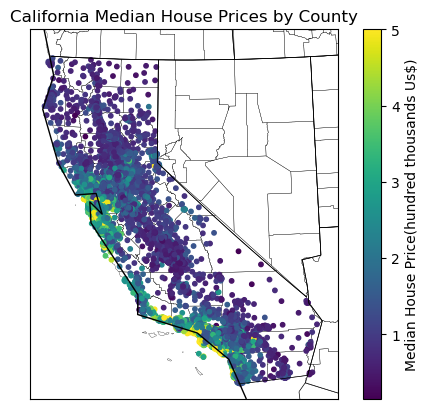

In [12]:
m = Basemap(
    projection='lcc',
    resolution='c',
    lat_0=37.5, lon_0=-119,
    width=1E6, height=1.2E6
)

m.drawcoastlines()
m.drawcountries()
m.drawstates()
m.drawcounties(linewidth=0.2) 

m.scatter(df['Longitude'], df['Latitude'], latlon=True, c=df['MedHouseVal'], cmap='viridis', marker='o', s=10)

plt.colorbar(label='Median House Price(hundred thousands Us$)')

plt.title('California Median House Prices by County')
plt.savefig('./images/medianhouseval-geomap.png')
plt.show()

### dividing prices into periodos

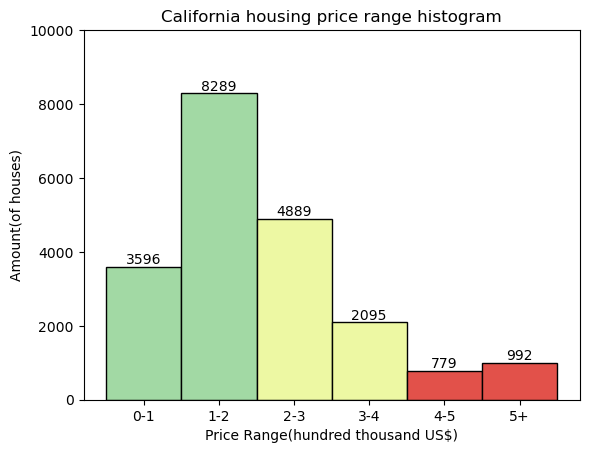

In [13]:
df_periodo=df.copy()
conditions = [
    (df_periodo['MedHouseVal'] >= 0.0) & (df_periodo['MedHouseVal'] < 1.0),
    (df_periodo['MedHouseVal'] >= 1.0) & (df_periodo['MedHouseVal'] < 2.0),
    (df_periodo['MedHouseVal'] >= 2.0) & (df_periodo['MedHouseVal'] < 3.0),
    (df_periodo['MedHouseVal'] >= 3.0) & (df_periodo['MedHouseVal'] < 4.0), 
    (df_periodo['MedHouseVal'] >= 4.0) & (df_periodo['MedHouseVal'] < 5.0), 
    (df_periodo['MedHouseVal'] >= 5.0)
]  
choices = ['0-1', '1-2', '2-3', '3-4','4-5','5+'] 
df_periodo['price_range']=np.select(conditions, choices, default='Error')  
df_periodo['price_range']=pd.Categorical(df_periodo['price_range'], categories=['0-1', '1-2', '2-3', '3-4','4-5','5+'], ordered=True)
cm=sns.color_palette('Spectral')
hist=sns.histplot(data=df_periodo,bins=6,x='price_range')  
hist.set_xlabel('Price Range(hundred thousand US$)') 
hist.set_ylabel('Amount(of houses)')  
plt.title('California housing price range histogram')
bin_order=['0-1', '1-2', '2-3', '3-4','4-5','5+'] 
hist.set_ylim(0,10000)
patches=hist.patches  
for k in range(0,2):
    patches[k].set_facecolor(cm[4]) 
for k in range(2,4): 
    patches[k].set_facecolor(cm[3])
for k in range(4,len(patches)):  
    patches[k].set_facecolor(cm[0]) 
for p in hist.patches:
    height = p.get_height()
    if height > 0:  
        hist.text(p.get_x() + p.get_width() / 2., height, f'{int(height)}', ha='center', va='bottom')
plt.savefig('./images/California housing price range histogram.png')   
plt.show()  


### reducing dimensions to see scatterplot with tsne

In [14]:
from sklearn.manifold import TSNE
df_tsne_sample=df.sample(frac=0.2) 
X_tsne_sample=df_tsne_sample.drop(columns=['MedHouseVal']) 
y_tsne_sample=df_tsne_sample['MedHouseVal']
tsne=TSNE(n_components=1,random_state=200)  #we apply the random state so that its not different everytime we restar 
array_red=tsne.fit_transform(X_tsne_sample) #applying dimensional reductioon on array  
df_tsne=pd.DataFrame(array_red,columns=['COMP1']) # making it into a pandas dataframe for easier viewing 
df_tsne = df_tsne.reset_index(drop=True)
y_tsne_sample = y_tsne_sample.reset_index(drop=True)
df_tsne

,COMP1
0,-83.561859
1,58.656944
2,22.838701
3,-73.318611
4,6.698576
...,...
4123,94.316902
4124,122.390434
4125,70.643890
4126,-64.525620


In [15]:
df_tsne['target']=y_tsne_sample
df_tsne

,COMP1,target
0,-83.561859,0.81300
1,58.656944,1.41400
2,22.838701,1.50700
3,-73.318611,1.08000
4,6.698576,5.00001
...,...,...
4123,94.316902,1.44000
4124,122.390434,0.87900
4125,70.643890,1.94900
4126,-64.525620,0.48800


In [16]:
array_red

array([[ -83.56186 ],
       [  58.656944],
       [  22.838701],
       ...,
       [  70.64389 ],
       [ -64.52562 ],
       [-110.69458 ]], dtype=float32)

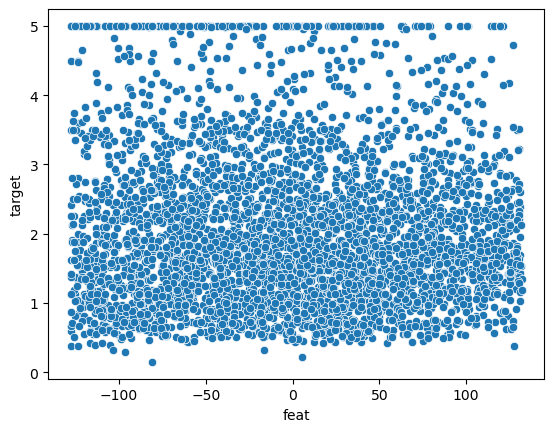

In [17]:
sns.scatterplot(data=df_tsne,x='COMP1',y='target') 
plt.xlabel("feat") 
plt.ylabel("target") 
plt.savefig('./images/dimension-reduction-tsne.png')
plt.show() 

### using dimensiality reduction with PCA

In [18]:
from sklearn.decomposition import PCA   
df_pca_sample=df.sample(frac=0.2) 
X_pca_sample=df_pca_sample.drop(columns=['MedHouseVal']) 
y_pca_sample=df_pca_sample['MedHouseVal']
pca=PCA(n_components=1) 
arrayFeat=pca.fit_transform(X_pca_sample) 
df_pca=pd.DataFrame(arrayFeat,columns=['COMP1']) # making it into a pandas dataframe for easier viewing 
df_pca = df_pca.reset_index(drop=True)
y_pca_sample = y_pca_sample.reset_index(drop=True)
df_pca 

,COMP1
0,-80.551330
1,-119.626450
2,-783.547726
3,187.399298
4,-441.613173
...,...
4123,655.452055
4124,719.424430
4125,-394.628917
4126,-259.571046


In [19]:
df_pca['target']=y_pca_sample 
df_pca

,COMP1,target
0,-80.551330,1.456
1,-119.626450,1.036
2,-783.547726,1.828
3,187.399298,1.187
4,-441.613173,1.287
...,...,...
4123,655.452055,3.531
4124,719.424430,1.480
4125,-394.628917,1.851
4126,-259.571046,1.951


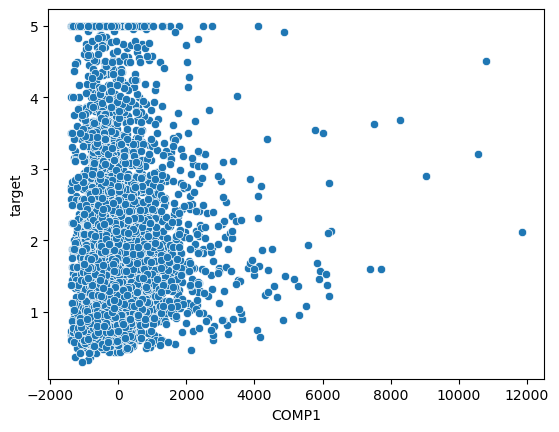

In [20]:
sns.scatterplot(data=df_pca,x='COMP1',y='target')
plt.savefig('./images/dimension-reduction-pca.png')
plt.show()

## SPLITTING DATA

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=32)

In [22]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
13545,2.2865,38.0,4.784387,1.055762,1047.0,3.892193,34.13,-117.31
2075,1.5750,34.0,4.376384,1.107011,774.0,2.856089,36.75,-119.84
5741,5.1242,52.0,5.570909,1.061818,631.0,2.294545,34.17,-118.25
16411,4.7500,21.0,4.602740,0.931507,206.0,2.821918,37.93,-121.22
14418,3.2625,18.0,6.151943,2.127208,508.0,1.795053,32.79,-117.24
...,...,...,...,...,...,...,...,...
5906,1.7062,28.0,4.370968,0.983871,246.0,3.967742,34.30,-118.43
19992,1.7462,29.0,4.681159,0.975845,1487.0,3.591787,36.20,-119.35
7537,2.6429,24.0,3.981959,1.007732,1807.0,4.657216,33.91,-118.21
4454,1.3125,37.0,3.250000,0.967391,318.0,3.456522,34.10,-118.17


In [23]:
y_train

13545    0.655
2075     0.571
5741     3.729
16411    1.214
14418    1.938
         ...  
5906     1.646
19992    0.511
7537     1.053
4454     1.458
7533     0.892
Name: MedHouseVal, Length: 16512, dtype: float64

In [24]:
X_test

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
2858,5.4592,27.0,6.800885,1.000000,1223.0,2.705752,35.39,-118.94
1023,2.2417,15.0,10.515306,2.372449,573.0,2.923469,38.72,-119.93
12847,3.2361,35.0,6.472028,1.143357,1007.0,3.520979,38.69,-121.37
8167,4.0893,41.0,4.805732,1.035032,821.0,2.614650,33.80,-118.13
20093,2.0625,37.0,24.669118,4.897059,338.0,2.485294,38.12,-120.12
...,...,...,...,...,...,...,...,...
15833,4.0000,52.0,5.269036,1.077834,1144.0,1.935702,37.75,-122.44
12993,4.5562,17.0,6.237219,0.983640,1490.0,3.047035,38.69,-121.25
12952,3.5750,35.0,5.373264,1.031250,1550.0,2.690972,38.71,-121.28
3458,2.7472,22.0,4.265416,1.101877,2661.0,3.567024,34.31,-118.44


In [25]:
y_test

2858     1.391
1023     0.979
12847    0.840
8167     2.230
20093    0.889
         ...  
15833    3.750
12993    1.345
12952    1.135
3458     1.601
16760    2.925
Name: MedHouseVal, Length: 4128, dtype: float64

## CREATING MODEL 

In [26]:
from sklearn.linear_model import LinearRegression  
from sklearn.tree import DecisionTreeRegressor


In [27]:
# model=DecisionTreeRegressor() 

In [28]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import cross_val_score,cross_val_predict,train_test_split 
from sklearn.datasets import load_diabetes 
from sklearn.decomposition import PCA  
from sklearn.tree import  DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.neighbors import RadiusNeighborsRegressor 
from sklearn.cross_decomposition import PLSCanonical,PLSRegression
from sklearn.ensemble import ExtraTreesRegressor 
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import VotingRegressor  
from xgboost import XGBRegressor
def getModels(): 
   return {"LINEAR REGRESSION":LinearRegression(), 
    "RANDOM FOREST":RandomForestRegressor(max_depth=9,min_samples_leaf=4,min_samples_split=8,n_estimators=200),
    "ADA BOOST":AdaBoostRegressor(learning_rate= 0.1, loss= 'exponential', n_estimators= 50), 
    "DECISION TREE":DecisionTreeRegressor(), 
    "SGD":make_pipeline(StandardScaler(),SGDRegressor(alpha= 0.01,eta0= 0.1,learning_rate= 'optimal',loss= 'epsilon_insensitive',max_iter= 100,penalty= 'l1',tol= 0.01)), 
    "KNN":KNeighborsRegressor(algorithm= 'ball_tree', leaf_size= 30, n_neighbors= 10, p= 1, weights= 'distance'),
    "EXTRA TREES":ExtraTreesRegressor(random_state=0,max_depth=6),
    "GRADIENT BOOST":GradientBoostingRegressor(random_state=0) , 
    "XGREGRESSOR":XGBRegressor(colsample_bytree= 0.8,gamma= 0,learning_rate= 0.1,max_depth= 7,n_estimators= 200,reg_alpha= 1,reg_lambda= 10,subsample= 1.0)}

## TRAINING MODEL

In [29]:
# model.fit(X_train,y_train)

In [30]:
models=getModels() 
for i in models.keys(): 
    models[i].fit(X_train,y_train)

""" scores =cross_val_score(getModel(),X,y,cv=10) 
print("R2: ",np.absolute(np.mean(scores))) """ 

print('models loaded') 
models

models loaded


{'LINEAR REGRESSION': LinearRegression(),
 'RANDOM FOREST': RandomForestRegressor(max_depth=9, min_samples_leaf=4, min_samples_split=8,
                       n_estimators=200),
 'ADA BOOST': AdaBoostRegressor(learning_rate=0.1, loss='exponential'),
 'DECISION TREE': DecisionTreeRegressor(),
 'SGD': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('sgdregressor',
                  SGDRegressor(alpha=0.01, eta0=0.1, learning_rate='optimal',
                               loss='epsilon_insensitive', max_iter=100,
                               penalty='l1', tol=0.01))]),
 'KNN': KNeighborsRegressor(algorithm='ball_tree', n_neighbors=10, p=1,
                     weights='distance'),
 'EXTRA TREES': ExtraTreesRegressor(max_depth=6, random_state=0),
 'GRADIENT BOOST': GradientBoostingRegressor(random_state=0),
 'XGREGRESSOR': XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsampl

## PREDICTING

In [31]:
scores={} 
predictions={} 
rmse={}  
mse={} 
metrics={}
from sklearn.metrics import mean_squared_error 
for i in models.keys():  
    predictions[i]=models[i].predict(X_test) 
    rmse[i]=mean_squared_error(y_test,predictions[i],squared=True)  
    mse[i]=mean_squared_error(y_test,predictions[i],squared=False) 
    metrics[i]={'MSE':mse[i],'RMSE':rmse[i]}
    scores[i]=rmse[i]


""" scores =cross_val_score(getModel(),X,y,cv=10) 
print("R2: ",np.absolute(np.mean(scores))) """ 

with open('./results/results.txt', 'w') as file:
    # Iterate over dictionary items and write them to the file
    for key, value in metrics.items():
        file.write(f'{key}: {value}\n')
metrics 

{'LINEAR REGRESSION': {'MSE': 0.7180673479477505, 'RMSE': 0.5156207161887157},
 'RANDOM FOREST': {'MSE': 0.5461661095545747, 'RMSE': 0.2982974192259797},
 'ADA BOOST': {'MSE': 0.748418022238328, 'RMSE': 0.5601295360111304},
 'DECISION TREE': {'MSE': 0.6916762980838709, 'RMSE': 0.47841610133100776},
 'SGD': {'MSE': 1.3953507165060117, 'RMSE': 1.9470036220538403},
 'KNN': {'MSE': 0.97524144878876, 'RMSE': 0.9510958834355995},
 'EXTRA TREES': {'MSE': 0.7363396143853667, 'RMSE': 0.5421960277131905},
 'GRADIENT BOOST': {'MSE': 0.5311521986594555, 'RMSE': 0.2821226581407737},
 'XGREGRESSOR': {'MSE': 0.44328414547377726, 'RMSE': 0.19650083362841692}}

### getting best parameter for models

#### RANDOM FOREST

In [32]:
# uncomment if you want to find the best parameters for random forest(takes a long long time)
# param_grid = {
#     'n_estimators': [50, 100,200],
#     'max_depth': [5,6,8,9],
#     'min_samples_split': [4,5,8,10],s
#     'min_samples_leaf': [2, 4,6]
# }
# rf = RandomForestRegressor()

# # Create GridSearchCV 
# print('started grid search')
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
# print('finish grid search')
# # Fit the model to the data 
# print('started fitting data')
# grid_search.fit(X_train, y_train)
# print('finished fitting data')
# # Get the best parameters 
# print('started printing params')
# best_params = grid_search.best_params_
# print("Best Parameters:", best_params)

# # Make predictions using the best model 
# print('started predicitons')
# y_pred = grid_search.predict(X_test)

# # Evaluate the model 
# print('started evaluating model')
# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error on Test Set:", mse)  
# print('started ving models')
# with open('grid_search_results.txt', 'w') as f:
#     f.write(f'Best Parameters: {best_params}\n')
#     f.write(f'Mean Squared Error on Test Set: {mse}\n')

#### ADABOOST

In [33]:
# uncomment if you wanna know the best params for adaboost
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'learning_rate': [0.01, 0.1, 1.0],  
#     'loss':['linear', 'square', 'exponential']
# }
# adaboost = AdaBoostRegressor()

# # Create GridSearchCV 
# print('started grid search')
# grid_search = GridSearchCV(estimator=adaboost, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
# print('finish grid search')
# # Fit the model to the data 
# print('started fitting data')
# grid_search.fit(X_train, y_train)
# print('finished fitting data')
# # Get the best parameters 
# print('started printing params')
# best_params = grid_search.best_params_
# print("Best Parameters:", best_params)

# # Make predictions using the best model 
# print('started predicitons')
# y_pred = grid_search.predict(X_test)

# # Evaluate the model 
# print('started evaluating model')
# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error on Test Set:", mse)  
# print('started ving models')
# with open('./parameters/adaboost-parameters.txt', 'w') as f:
#     f.write(f'Best Parameters: {best_params}\n')
#     f.write(f'Mean Squared Error on Test Set: {mse}\n')

#### KNN 

In [34]:
# uncomment if you wanna know the best params for knn
# param_grid = {
#     'n_neighbors': [3, 5, 7, 10],
#     'weights': ['uniform', 'distance'],
#     'p': [1, 2], 
#     'algorithm':['ball_tree', 'kd_tree', 'brute'], 
#     'leaf_size':[30,15,7,40,60,5]
# }
# knn = KNeighborsRegressor()

# # Create GridSearchCV 
# print('started grid search')
# grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
# print('finish grid search')
# # Fit the model to the data 
# print('started fitting data')
# grid_search.fit(X_train, y_train)
# print('finished fitting data')
# # Get the best parameters 
# print('started printing params')
# best_params = grid_search.best_params_
# print("Best Parameters:", best_params)

# # Make predictions using the best model 
# print('started predicitons')
# y_pred = grid_search.predict(X_test)

# # Evaluate the model 
# print('started evaluating model')
# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error on Test Set:", mse)  
# print('started ving models')
# with open('./parameters/knn-parameters.txt', 'w') as f:
#     f.write(f'Best Parameters: {best_params}\n')
#     f.write(f'Mean Squared Error on Test Set: {mse}\n')

#### SGD

In [35]:
# uncomment if you wanna know the best params for sgd
# param_grid = {
#     'sgdregressor__loss': ['squared_loss', 'huber', 'epsilon_insensitive'],
#     'sgdregressor__penalty': ['l1', 'l2', 'elasticnet'],
#     'sgdregressor__alpha': [0.0001, 0.001, 0.01],
#     'sgdregressor__learning_rate': ['constant', 'optimal', 'invscaling'],
#     'sgdregressor__eta0': [0.01, 0.1, 0.5],
#     'sgdregressor__tol': [1e-4, 1e-3, 1e-2],
#     'sgdregressor__max_iter': [100, 500, 1000]  
# }
# pipe = make_pipeline(StandardScaler(), SGDRegressor())

# # Create GridSearchCV 
# print('started grid search')
# grid_search = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
# print('finish grid search')
# # Fit the model to the data 
# print('started fitting data')
# grid_search.fit(X_train, y_train)
# print('finished fitting data')
# # Get the best parameters 
# print('started printing params')
# best_params = grid_search.best_params_
# print("Best Parameters:", best_params)

# # Make predictions using the best model 
# print('started predicitons')
# y_pred = grid_search.predict(X_test)

# # Evaluate the model 
# print('started evaluating model')
# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error on Test Set:", mse)  
# print('started saving models')
# with open('./parameters/svg-parameters.txt', 'w') as f:
#     f.write(f'Best Parameters: {best_params}\n')
#     f.write(f'Mean Squared Error on Test Set: {mse}\n')

#### XGBOOSTER

In [36]:
# uncomment if you wanna know the best params for xgbooster(takes a REALLY long time)
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'learning_rate': [0.01, 0.1, 0.5],
#     'max_depth': [3, 5, 7],
#     'subsample': [0.8, 1.0],
#     'colsample_bytree': [0.8, 1.0],
#     'gamma': [0, 1, 5],
#     'reg_alpha': [0, 1, 10],
#     'reg_lambda': [0, 1, 10]
# }
# xgb_reg = XGBRegressor()
# # Create GridSearchCV 
# print('started grid search')
# grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
# print('finish grid search')
# # Fit the model to the data 
# print('started fitting data')
# grid_search.fit(X_train, y_train)
# print('finished fitting data')
# # Get the best parameters 
# print('started printing params')
# best_params = grid_search.best_params_
# print("Best Parameters:", best_params)

# # Make predictions using the best model 
# print('started predicitons')
# y_pred = grid_search.predict(X_test)

# # Evaluate the model 
# print('started evaluating model')
# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error on Test Set:", mse)  
# print('started saving models')
# with open('./parameters/xgbooster-parameters.txt', 'w') as f:
#     f.write(f'Best Parameters: {best_params}\n')
#     f.write(f'Mean Squared Error on Test Set: {mse}\n')

### comparing each model

In [37]:
# plt.scatter(y_test, y_pred,edgecolor='black')
# plt.xlabel("True Values")
# plt.ylabel("Predictions")
# plt.title("True Values vs Predictions in Regression")
# plt.show()

['LINEAR REGRESSION', 'RANDOM FOREST', 'ADA BOOST', 'DECISION TREE', 'SGD', 'KNN', 'EXTRA TREES', 'GRADIENT BOOST', 'XGREGRESSOR']
9


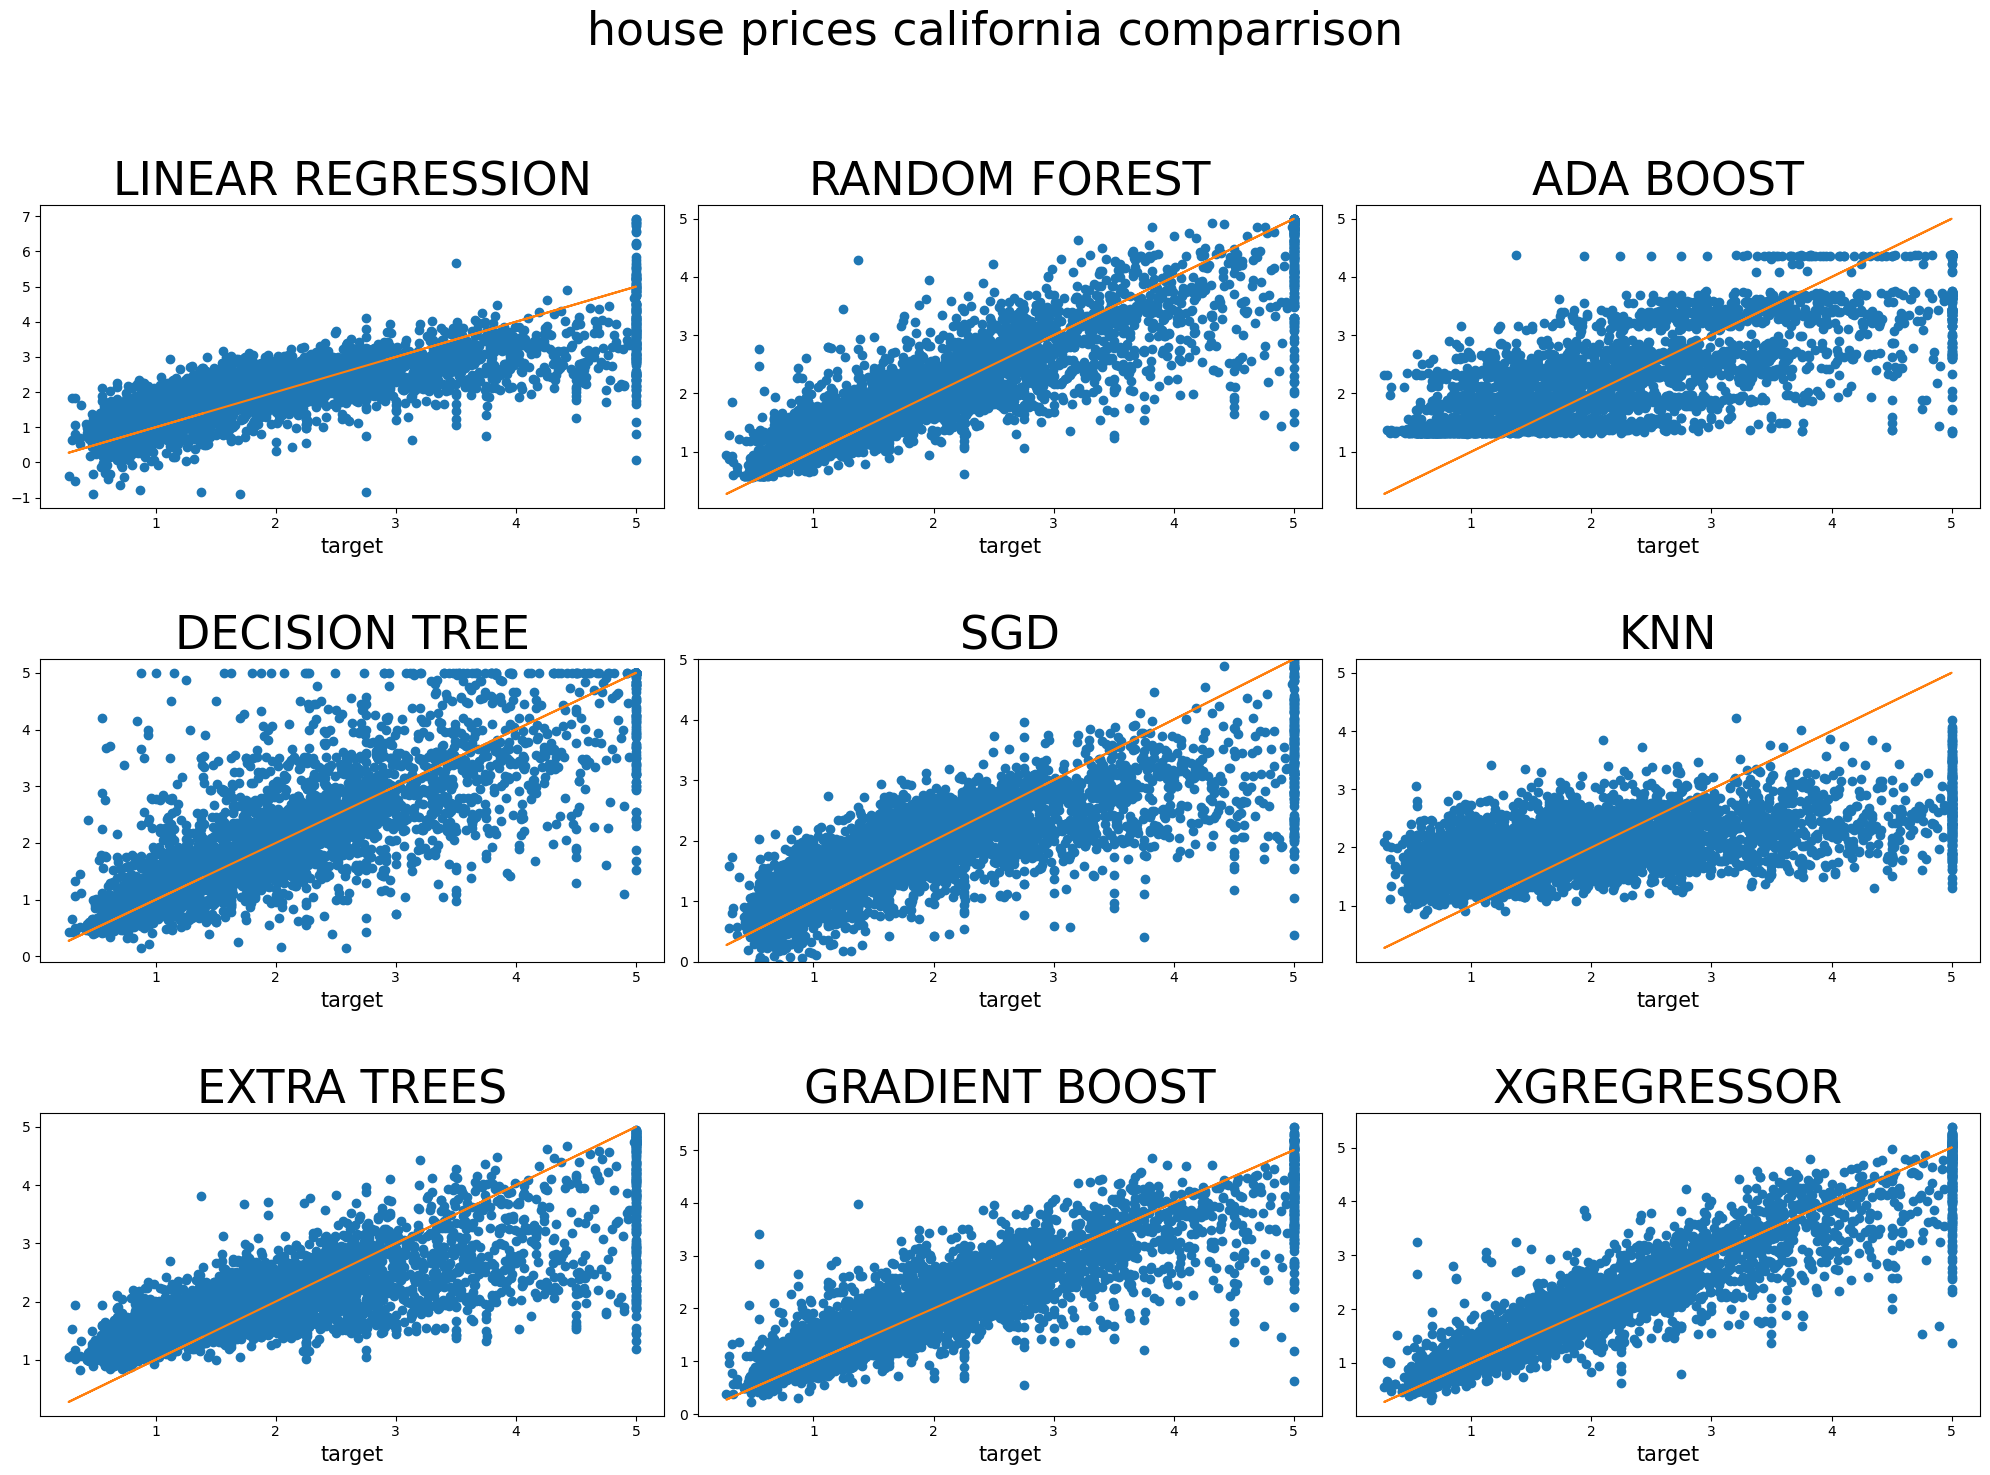

In [38]:
auxdic=scores
auxdic=list(auxdic.items())

fig,ax =plt.subplots(3,3) 
fig.suptitle("house prices california comparrison",size=33)   
fig.set_figwidth(20)
fig.set_figheight(15)
dimX=ax.shape[0] 
dimY=ax.shape[1] 
predictionsList= []
for i in predictions.keys():
    predictionsList.append(predictions[i]) 
predictionsList=np.transpose(predictionsList) 
predictionsList=pd.DataFrame(predictionsList,columns=models.keys())  

#print(predictions)
#predictions=np.transpose(pd.DataFrame(predictions)) 
m_keys=list(models.keys()) 
print(m_keys) 
print(len(m_keys))
for i in range(dimX): 
    for j in range(dimY) : 
        oneDIndex=(i*dimX)+j  
        ax[i,j].plot(y_test,predictions[m_keys[oneDIndex]],"o")  
        ax[i,j].set_title(m_keys[oneDIndex],size=33) 
        ax[i,j].set_xlabel("target",size=15) 
        ax[i,j].set_xbound(lower=0,upper=10)
        if m_keys[oneDIndex] == 'SGD': 
            ax[i,j].set_ybound(lower=0,upper=12) 
            ax[i,j].set_ylim(0,5) 
        m,b=np.polyfit(y_test,y_test,deg=1)
        ax[i,j].plot(y_test,m*y_test+b)
        # centerish=ax[i,j].get_xbound()[1]/2
        # centerishY=ax[i,j].get_ybound()[1]/2
        # ax[i,j].text(x=centerish-13,y=-centerishY/2.5,s=("R2:%f" % float(auxdic[oneDIndex][1])),ma="center")
fig.align_labels() 
fig.tight_layout()
fig.subplots_adjust(top=0.85,hspace=0.5) 
plt.savefig('./images/model-comparrison.png')

### getting residuals

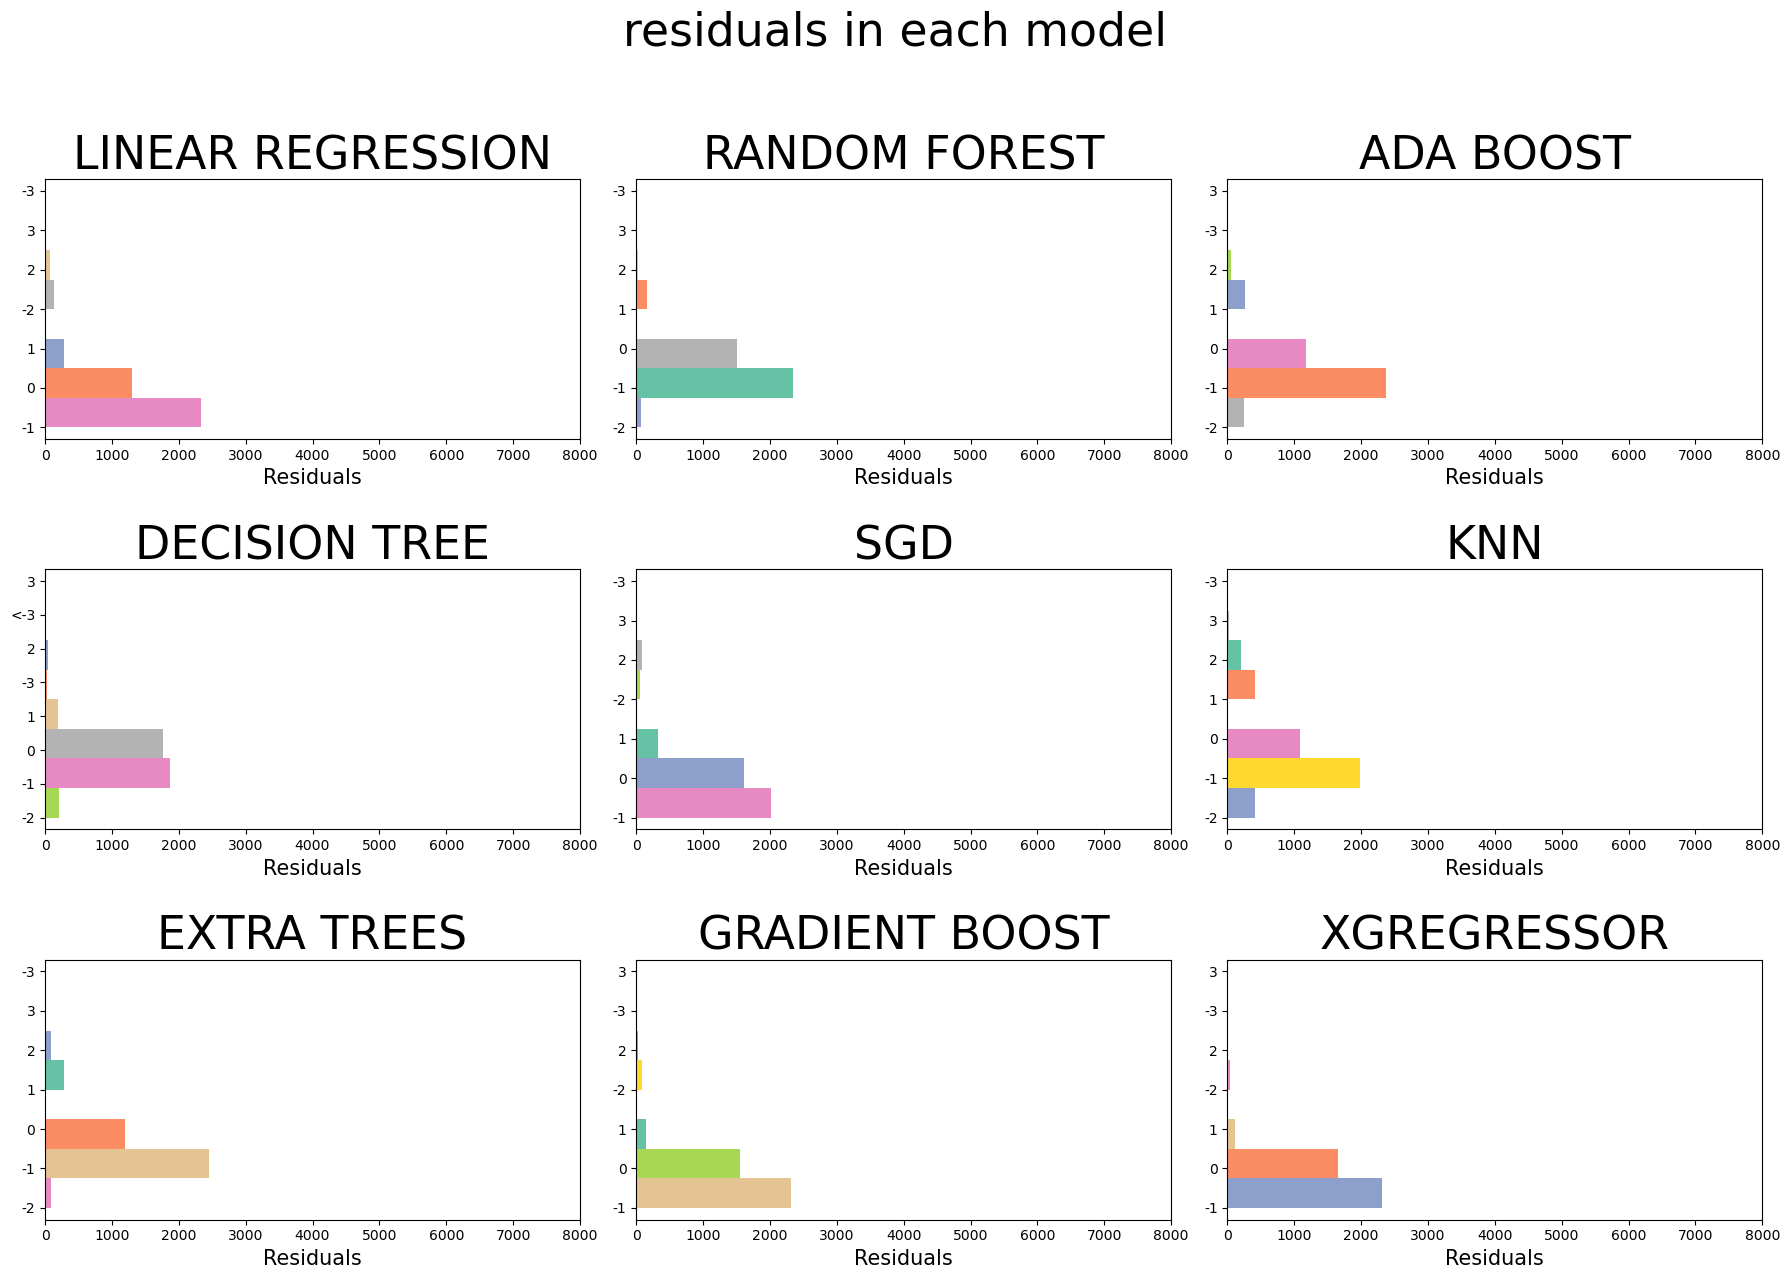

In [39]:
import random as rd
# residuals = y_test - y_pred
# plt.hist(residuals, bins=50)
# plt.xlabel("Residuals")
# plt.ylabel("Frequency")
# plt.title("Distribution of Residuals in Regression")
# plt.show() 

auxdic=scores
auxdic=list(auxdic.items())
df_residuals=df.copy()
fig,ax =plt.subplots(3,3) 
fig.suptitle("residuals in each model",size=33)   
fig.set_figwidth(18)
fig.set_figheight(13)
dimX=ax.shape[0] 
dimY=ax.shape[1] 
predictionsList= []
residuals_list=[] 
for i in predictions.keys():
    predictionsList.append(predictions[i])  
    residuals_list.append(y_test - predictions[i])
predictionsList=np.transpose(predictionsList) 
predictionsList=pd.DataFrame(predictionsList,columns=models.keys())  
residuals_list= np.transpose(residuals_list) 
df_residuals=pd.DataFrame(data=residuals_list, columns=predictions.keys()) 
for pKey in predictions.keys():     
    s_conditions = [ 
        (df_residuals[pKey] < -3),
        (df_residuals[pKey] >= -3) & (df_residuals[pKey] < -2),
        (df_residuals[pKey] >= -2) & (df_residuals[pKey] < -1),
        (df_residuals[pKey] >= -1) & (df_residuals[pKey] < 0),
        (df_residuals[pKey] >= 0) & (df_residuals[pKey] < 1), 
        (df_residuals[pKey] >= 1) & (df_residuals[pKey] < 2), 
        (df_residuals[pKey] >= 2) & (df_residuals[pKey] < 3), 
        (df_residuals[pKey] >= 3) 
    ] 
    s_choices=  [
                    '<-3',
                    '-3',
                    '-2',
                    '-1',
                    '0',
                    '1',
                    '2',
                    '3' 
                ]
    df_residuals[pKey + '_RANGE']=np.select(s_conditions, s_choices, default='Error')  
    df_residuals[pKey + '_RANGE']=pd.Categorical(df_residuals[pKey + '_RANGE'], categories=s_choices, ordered=True)    
m_keys=list(models.keys())   
axel=np.zeros(len(m_keys))
cm = sns.color_palette('Set2', n_colors=8)
for i in range(dimX): 
    for j in range(dimY) : 
        oneDIndex=(i*dimX)+j   
        patches=[]
        #ax[i,j].plot(y_test,predictions[m_keys[oneDIndex]],"o")  
        residuals = y_test - predictions[m_keys[oneDIndex]]  
        # new_df=[]
        # new_df=pd.DataFrame(df_residuals[m_keys[oneDIndex] +'_RANGE'].value_counts())   
        N, bins, patches=ax[i,j].hist(x=df_residuals[m_keys[oneDIndex] +'_RANGE'],bins=8,orientation='horizontal')  
        used=[]
        for k in range(0,len(patches)): 
            index = rd.randint(0,len(patches)-1)   
            height = patches[k].get_width()
            while index == -1  or index in used: 
                index = rd.randint(0,len(patches)-1) 
            used.append(index)  
            patches[k].set_facecolor(cm[index]) 
            # if height > 0:  
            #     ax[i,j].text(patches[k].get_y() + patches[k].get_height() / 2., height, f'{int(height)}', ha='center', va='bottom')         
        ax[i,j].set_title(m_keys[oneDIndex],size=33) 
        # ax[i,j].set_ylim(0, )
        ax[i,j].set_xlabel("Residuals",size=15)  
        max_residual = max(abs(residuals))
        ax[i, j].set_xlim(0, 8000)
        # ax[i,j].set_xbound(lower=0,upper=10)
        # centerish=ax[i,j].get_xbound()[1]/2
        # centerishY=ax[i,j].get_ybound()[1]/2
        # ax[i,j].text(x=centerish-13,y=-centerishY/2.5,s=("R2:%f" % float(auxdic[oneDIndex][1])),ma="center") 
        
fig.align_labels() 
fig.tight_layout()
fig.subplots_adjust(top=0.85,hspace=0.5) 
plt.savefig('./images/residuals-by-model.png')   
plt.show()

In [40]:
new_df

NameError: name 'new_df' is not defined

In [ ]:
df_residuals 
# ax =sns.histplot(data=df_residuals,x='DECISION TREE_RANGE') 
#arnaldo=sns.barplot(data=df_residuals['LINEAR REGRESSION_RANGE'].value_counts(),orient='h') 
new_df=pd.DataFrame(df_residuals['LINEAR REGRESSION_RANGE'].value_counts())  
new_df

,count
LINEAR REGRESSION_RANGE,
>= -1 x < 0,2315
>= 0 x < 1,1345
>= 1 x < 2,242
>= -2 x < -1,131
>= 2 x < 3,78
>= 3,9
>= -3 x < -2,6
< -3,2


In [ ]:
df_residuals['DECISION TREE_RANGE'].value_counts()

DECISION TREE_RANGE
>= 0 x < 1       1868
>= -1 x < 0      1760
>= -2 x < -1      216
>= 1 x < 2        181
>= -3 x < -2       44
>= 2 x < 3         34
< -3               13
>= 3               12
Name: count, dtype: int64

### true values vs predicitons

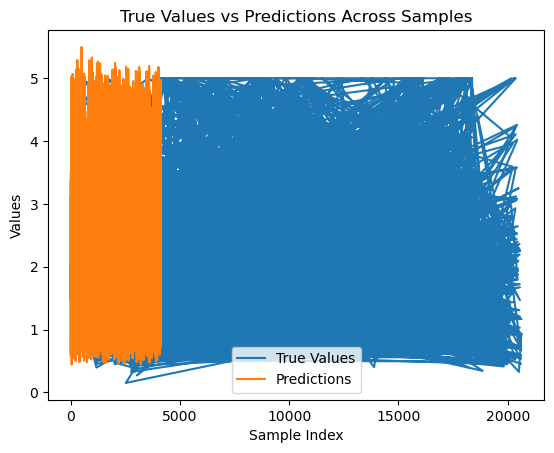

In [ ]:
plt.plot(y_test, label='True Values')
plt.plot(predictions['XGREGRESSOR'], label='Predictions')
plt.xlabel("Sample Index")
plt.ylabel("Values")
plt.title("True Values vs Predictions Across Samples")
plt.legend()
plt.show()